In [3]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("ealtman2019/ibm-transactions-for-anti-money-laundering-aml")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\damaso.hernandez\.cache\kagglehub\datasets\ealtman2019\ibm-transactions-for-anti-money-laundering-aml\versions\8


## Conocimineto de la base: Transacciones de IBM para la lucha contra el blanqueo de capitales (AML)

El acceso a datos reales de transacciones financieras está muy restringido, tanto por motivos de propiedad como de privacidad. Incluso cuando es posible acceder, resulta problemático asignar una etiqueta correcta (de blanqueo o legítima) a cada transacción, como se mencionó anteriormente. Los datos sintéticos de transacciones de IBM evitan estos problemas.

Los datos que se proporcionan aquí se basan en un mundo virtual habitado por individuos, empresas y bancos. Los individuos interactúan con otros individuos y empresas. Asimismo, las empresas interactúan con otras empresas y con individuos. Estas interacciones pueden adoptar diversas formas, como la compra de bienes y servicios de consumo, órdenes de compra de suministros industriales, el pago de salarios, la devolución de préstamos, etc. Estas transacciones financieras se realizan generalmente a través de bancos, es decir, tanto el pagador como el receptor tienen cuentas, que pueden adoptar diversas formas, desde cuentas corrientes hasta tarjetas de crédito y bitcoin.

In [7]:
import pandas as pd

# Reemplaza por el nombre correcto del archivo
df = pd.read_csv(f"{path}/HI-Small_Trans.csv", nrows=500000)

# Imprimir  filas y columnas
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 500000 filas y 11 columnas.


In [9]:
# Ver las primeras 5 filas
df.head(10)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0
5,2022/09/01 00:03,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0
6,2022/09/01 00:08,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0
7,2022/09/01 00:16,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0
8,2022/09/01 00:26,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0
9,2022/09/01 00:21,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0


## Descripción de las variables

In [11]:
import pandas as pd

# Suponiendo que ya cargaste el DataFrame como df
resumen = []

for col in df.columns:
    tipo = df[col].dtype
    nulos = df[col].isnull().sum()
    unicos = df[col].nunique()

    if tipo == 'object' or df[col].dtype.name == 'category':
        ejemplos = df[col].value_counts().head(5).to_dict()
    else:
        ejemplos = None

    resumen.append({
        'Variable': col,
        'Tipo': tipo,
        'Nulos': nulos,
        'Valores únicos': unicos,
        'Ejemplos / Top categorías': ejemplos
    })

resumen_df = pd.DataFrame(resumen)
resumen_df.head(20)

,Variable,Tipo,Nulos,Valores únicos,Ejemplos / Top categorías
0,Timestamp,object,0,481,"{'2022/09/01 00:04': 11193, '2022/09/01 00:26'..."
1,From Bank,int64,0,16606,None
2,Account,object,0,298058,"{'100428660': 7070, '1004286A8': 4085, '100428..."
3,To Bank,int64,0,12967,None
4,Account.1,object,0,292259,"{'8146532E1': 67, '80DAA12D0': 60, '805119390'..."
5,Amount Received,float64,0,340734,None
6,Receiving Currency,object,0,15,"{'US Dollar': 189420, 'Euro': 114387, 'Swiss F..."
7,Amount Paid,float64,0,342931,None
8,Payment Currency,object,0,15,"{'US Dollar': 190123, 'Euro': 114124, 'Swiss F..."
9,Payment Format,object,0,7,"{'Reinvestment': 285394, 'Cheque': 81362, 'Cre..."


## Lectura de categorias de variables

In [13]:
# Tipos de datos

# Listado de monedas únicas
print("Listado de monedas encontradas:")
print(df['Payment Currency'].unique())

print("\n" + "="*100 + "\n")
print("Categoria de Lavado:")
print(df['Is Laundering'].unique())

print("\n" + "="*100 + "\n")
print("Listado de monedas de pago:")
print(df['Payment Format'].unique())


Listado de monedas encontradas:
['US Dollar' 'Bitcoin' 'Euro' 'Australian Dollar' 'Yuan' 'Rupee' 'Yen'
 'Mexican Peso' 'UK Pound' 'Ruble' 'Canadian Dollar' 'Swiss Franc'
 'Brazil Real' 'Saudi Riyal' 'Shekel']


Categoria de Lavado:
[0 1]


Listado de monedas de pago:
['Reinvestment' 'Cheque' 'Credit Card' 'ACH' 'Cash' 'Wire' 'Bitcoin']


## tabla cruzada de Formato de pago y moneda

In [15]:
import pandas as pd
# Crear tabla cruzada entre 'Payment Currency' y 'Payment Format'
cruzada = pd.crosstab(df['Payment Currency'], df['Payment Format'])

# Imprimir encabezado de la tabla cruzada
print("\nTabla cruzada entre 'Payment Currency' y 'Payment Format':")
print(cruzada.head())


Tabla cruzada entre 'Payment Currency' y 'Payment Format':
Payment Format      ACH  Bitcoin  Cash  Cheque  Credit Card  Reinvestment  \
Payment Currency                                                            
Australian Dollar   820        0   640    2312         1673          7567   
Bitcoin               5    13910     0       0            0             0   
Brazil Real         391        0   307    1214          829          3985   
Canadian Dollar     807        0   593    2188         1638          7841   
Euro               6729        0  4879   18172        13806         68585   

Payment Format     Wire  
Payment Currency         
Australian Dollar   253  
Bitcoin               1  
Brazil Real         140  
Canadian Dollar     242  
Euro               1953  


## Todas la moneda a Dolares

In [17]:
# Ejemplo de diccionario de tasas (1 unidad de moneda local = X USD)
tasas = {
    'US Dollar': 1.0,
    'Bitcoin': 68000.0,           # 1 BTC ≈ 68,000 USD
    'Euro': 1.07,
    'Australian Dollar': 0.66,
    'Yuan': 0.14,
    'Rupee': 0.012,
    'Yen': 0.0064,
    'Mexican Peso': 0.055,
    'UK Pound': 1.27,
    'Ruble': 0.011,
    'Canadian Dollar': 0.73,
    'Swiss Franc': 1.12,
    'Brazil Real': 0.19,          # 1 BRL ≈ 0.19 USD
    'Saudi Riyal': 0.27,          # 1 SAR ≈ 0.27 USD
    'Shekel': 0.27                # 1 ILS ≈ 0.27 USD (Israel)
}


# Si usas un dict:
df['tasa_pago']     = df['Payment Currency'].map(tasas)
df['tasa_recibido'] = df['Receiving Currency'].map(tasas)


df['Amount Paid']   = df['Amount Paid'] * df['tasa_pago']
df['Amount Received']= df['Amount Received'] * df['tasa_recibido']

## Descripción de Los datos principales

<ipython-input-9-1449699943>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-1449699943>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-1449699943>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-1449699943>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


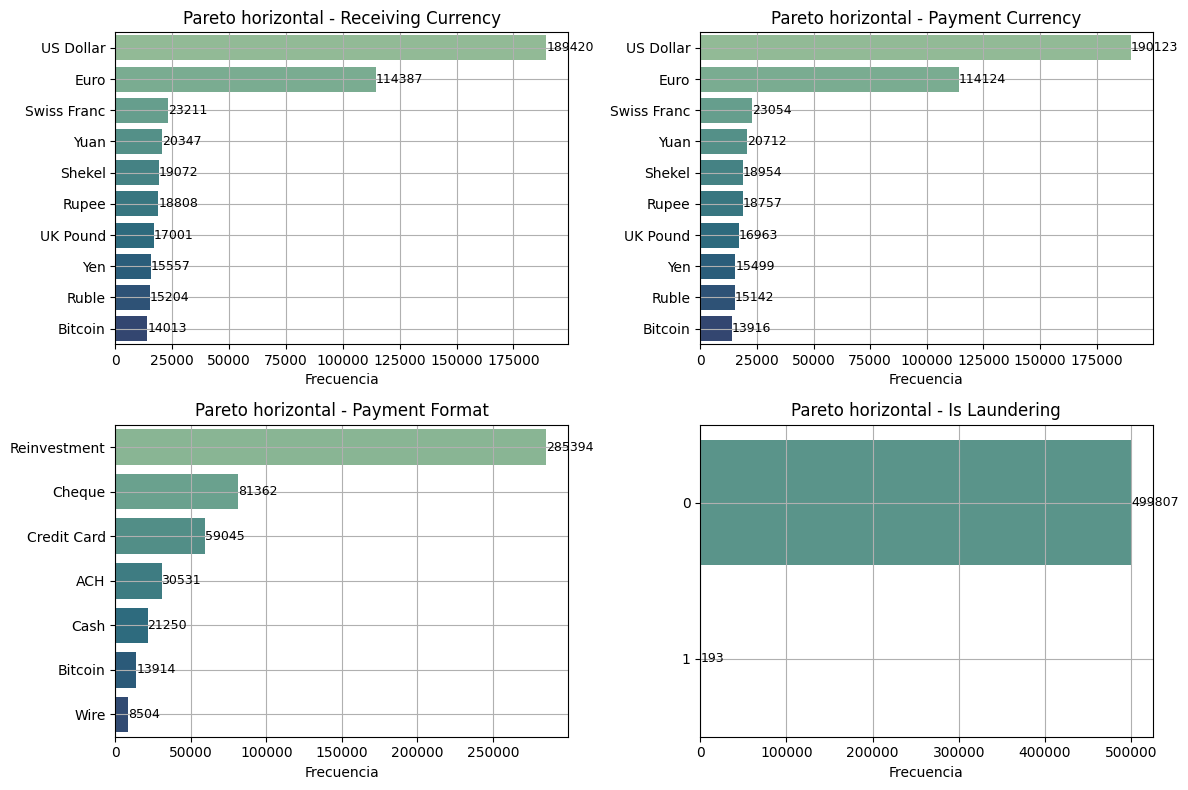

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables categóricas
categoricas = ['Receiving Currency', 'Payment Currency', 'Payment Format', 'Is Laundering']

# Configuración de subgráficos
n = len(categoricas)
ncols = 2
nrows = -(-n // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()

for i, var in enumerate(categoricas):
    ax = axes[i]

    try:
        # Asegurarse de no tener NaN ni valores mal formateados
        conteo = df[var].astype(str).value_counts().nlargest(10)
        data = conteo.reset_index()
        data.columns = [var, 'Frecuencia']

        # Gráfico de barras horizontal tipo Pareto
        sns.barplot(
            data=data,
            y=var,
            x='Frecuencia',
            ax=ax,
            palette='crest'
        )

        ax.set_title(f"Pareto horizontal - {var}")
        ax.set_xlabel("Frecuencia")
        ax.set_ylabel("")
        ax.grid(True)

        # Etiquetas en las barras
        for j, v in enumerate(data['Frecuencia']):
            ax.text(v, j, str(v), va='center', ha='left', fontsize=9)

    except Exception as e:
        ax.set_visible(False)
        print(f"⚠️ Error al graficar {var}: {e}")

# Ocultar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Descripción de Los datos principales

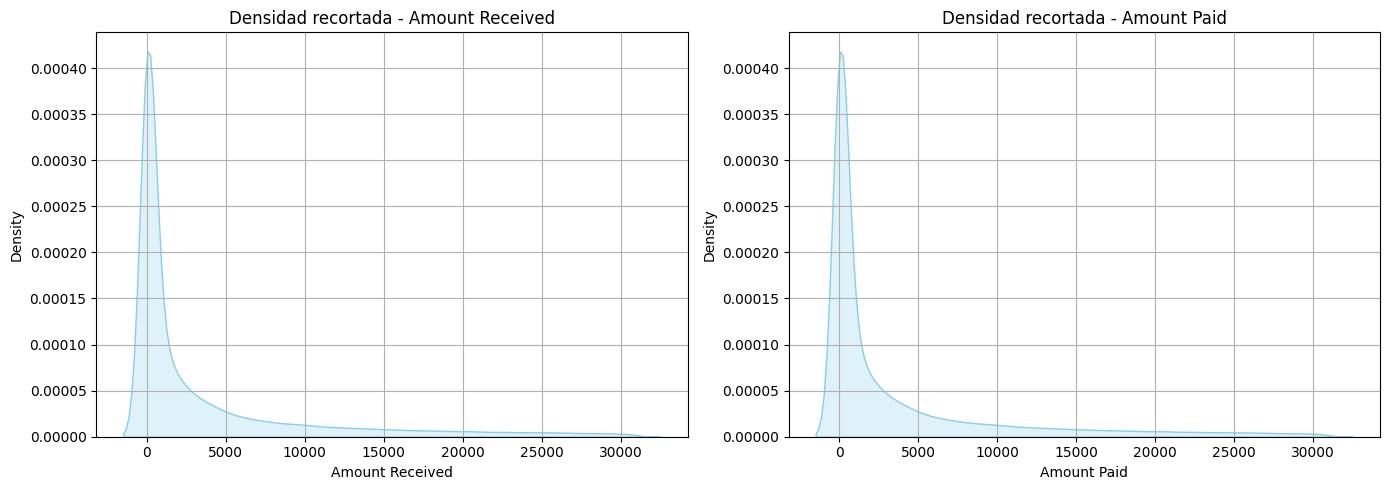

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas continuas
numericas = ['Amount Received', 'Amount Paid']

# Configurar subplots
n = len(numericas)
fig, axes = plt.subplots(1, n, figsize=(14, 5))

for i, var in enumerate(numericas):
    ax = axes[i]

    # Recortar entre el 1% y el 99% percentil
    lower = df[var].quantile(0.01)
    upper = df[var].quantile(0.80)
    datos_filtrados = df[(df[var] >= lower) & (df[var] <= upper)][var]

    sns.kdeplot(datos_filtrados, fill=True, color='skyblue', ax=ax)
    ax.set_title(f'Densidad recortada - {var}')
    ax.set_xlabel(var)
    ax.grid(True)

plt.tight_layout()
plt.show()

# Calcular resumen agrupado por cuenta Origen y Calcular resumen agrupado por cuentas Destino

In [11]:
# Calcular resumen agrupado
resumen = df.groupby('Account').agg(
    total_transacciones=('Account.1', 'count'),
    total_monto=('Amount Paid', 'sum'),
    media_monto=('Amount Paid', 'mean'),
    std_monto=('Amount Paid', 'std'),
    transacciones_sospechosas=('Is Laundering', 'sum'),
    cuentas_destino_distintas=('Account.1', pd.Series.nunique)
).reset_index()

# Reemplazar NaN en std por 0
resumen['std_monto'] = resumen['std_monto'].fillna(0)
# Calcular proporción de transacciones sospechosas
resumen['proporcion_sospechosa'] = resumen['transacciones_sospechosas'] / resumen['total_transacciones']
resumen['razon_de_destino'] = resumen['cuentas_destino_distintas'] / resumen['total_transacciones']

# Marcar como cuenta sospechosa si supera el 0.5% (0.005 en proporción)
resumen['cuenta_sospechosa'] = resumen['proporcion_sospechosa'] > 0.00



# 1. Calcular resumen agrupado por cuentas Destino
resumen_D = df.groupby('Account.1').agg(
    D_trans_Destino     = ('Account.1', 'count'),           # número de transacciones recibidas
    D_total_monto       = ('Amount Paid', 'sum'),
    D_media_monto       = ('Amount Paid', 'mean'),
    D_std_monto         = ('Amount Paid', 'std'),
    D_trans_sospechosas = ('Is Laundering', 'sum'),
    D_cuentas_Orígenes  = ('Account', pd.Series.nunique)    # cuántas cuentas origen distintas llegan aquí
).reset_index()

# 2. Rellenar NaN en desviación estándar
resumen_D['D_std_monto'] = resumen_D['D_std_monto'].fillna(0)

# 3. Calcular proporción de transacciones sospechosas
resumen_D['D_prop_sospe'] = (
    resumen_D['D_trans_sospechosas'] / resumen_D['D_trans_Destino']
)

# 4. Calcular razón de cuentas origen por transacción
resumen_D['razon_de_origen'] = (
    resumen_D['D_cuentas_Orígenes'] / resumen_D['D_trans_Destino']
)


# Marcar como cuenta sospechosa si supera el 0.5% (0.005 en proporción)
resumen_D['D_cuenta_sospechosa'] = resumen_D['D_prop_sospe'] > 0.00
# 5. Verifica nombres de columnas


## Union entre los resumenes de cuenta Origen y Cuenta Destino

In [12]:
# Asegúrate de que en resumen_final la clave sea 'Account'
# y en resumen_D la clave para el merge sea 'Account.1'

# Merge izquierdo (resumen_final preserva todas sus filas)
resumen_unido = resumen.merge(
    resumen_D,
    left_on='Account',
    right_on='Account.1',
    how='left'
)

# Opcional: eliminar la columna duplicada 'Account.1'
resumen_unido = resumen_unido.drop(columns='Account.1')

# Mostrar las primeras filas del DataFrame combinado
resumen_unido.head(10)

,Account,total_transacciones,total_monto,media_monto,std_monto,transacciones_sospechosas,cuentas_destino_distintas,proporcion_sospechosa,razon_de_destino,cuenta_sospechosa,D_trans_Destino,D_total_monto,D_media_monto,D_std_monto,D_trans_sospechosas,D_cuentas_Orígenes,D_prop_sospe,razon_de_origen,D_cuenta_sospechosa
0,100428660,7070,5.606132e+09,7.929465e+05,1.379749e+07,12,3421,0.001697,0.483876,True,3.0,0.10000,0.033333,0.025166,0.0,3.0,0.0,1.0,False
1,1004286A8,4085,5.004177e+09,1.225013e+06,1.997471e+07,6,2004,0.001469,0.490575,True,3.0,0.07490,0.024967,0.024711,0.0,3.0,0.0,1.0,False
2,1004286F0,719,2.575133e+08,3.581548e+05,4.360145e+06,1,353,0.001391,0.490960,True,2.0,0.00280,0.001400,0.000000,0.0,2.0,0.0,1.0,False
3,100428738,571,7.196059e+07,1.260255e+05,7.376479e+05,3,274,0.005254,0.479860,True,4.0,0.01536,0.003840,0.005797,0.0,4.0,0.0,1.0,False
4,100428780,675,7.143033e+08,1.058227e+06,1.466983e+07,1,328,0.001481,0.485926,True,4.0,0.00384,0.000960,0.000427,0.0,4.0,0.0,1.0,False
5,1004287C8,598,1.505570e+08,2.517675e+05,2.167903e+06,2,284,0.003344,0.474916,True,6.0,15121.07047,2520.178412,6173.142008,0.0,6.0,0.0,1.0,False
6,100428810,690,5.707136e+08,8.271212e+05,7.769239e+06,0,336,0.000000,0.486957,False,2.0,0.05080,0.025400,0.017961,0.0,2.0,0.0,1.0,False
7,100428858,430,1.851111e+08,4.304909e+05,4.129136e+06,1,211,0.002326,0.490698,True,1.0,122543.44290,122543.442900,0.000000,0.0,1.0,0.0,1.0,False
8,1004288A0,487,7.020638e+07,1.441610e+05,1.245120e+06,0,237,0.000000,0.486653,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1004288E8,422,5.994293e+08,1.420449e+06,1.708762e+07,0,206,0.000000,0.488152,False,2.0,0.01650,0.008250,0.010889,0.0,2.0,0.0,1.0,False


## Colocar el Formato de pago como columnas

In [13]:
# Crear tabla de frecuencias por Account y Payment Format
format_counts = df.groupby(['Account', 'Payment Format']).size().unstack(fill_value=0)

# Calcular proporciones dentro de cada cuenta
format_props = format_counts.div(format_counts.sum(axis=1), axis=0)

# Renombrar columnas para que tengan el prefijo 'format_'
format_props.columns = [f'format_{col.lower()}' for col in format_props.columns]

# Combinar con el resumen anterior
resumen_unido = resumen_unido.merge(format_props, left_on='Account', right_index=True, how='left')
# Mostrar resumen






In [ ]:
resumen_unido.head()

,Account,total_transacciones,total_monto,media_monto,std_monto,transacciones_sospechosas,cuentas_destino_distintas,proporcion_sospechosa,razon_de_destino,cuenta_sospechosa,...,D_prop_sospe,razon_de_origen,D_cuenta_sospechosa,format_ach,format_bitcoin,format_cash,format_cheque,format_credit card,format_reinvestment,format_wire
0,100428660,7070,5.606132e+09,7.929465e+05,1.379749e+07,12,3421,0.001697,0.483876,True,...,0.0,1.0,False,0.0,0.0,0.227157,0.476803,0.296040,0.0,0.0
1,1004286A8,4085,5.004177e+09,1.225013e+06,1.997471e+07,6,2004,0.001469,0.490575,True,...,0.0,1.0,False,0.0,0.0,0.221297,0.478091,0.300612,0.0,0.0
2,1004286F0,719,2.575133e+08,3.581548e+05,4.360145e+06,1,353,0.001391,0.490960,True,...,0.0,1.0,False,0.0,0.0,0.230876,0.479833,0.289291,0.0,0.0
3,100428738,571,7.196059e+07,1.260255e+05,7.376479e+05,3,274,0.005254,0.479860,True,...,0.0,1.0,False,0.0,0.0,0.231173,0.467601,0.301226,0.0,0.0
4,100428780,675,7.143033e+08,1.058227e+06,1.466983e+07,1,328,0.001481,0.485926,True,...,0.0,1.0,False,0.0,0.0,0.232593,0.475556,0.291852,0.0,0.0


4. Calcular razón de cuentas origen por transacción

In [14]:
# 4. Calcular razón de cuentas origen por transacción
resumen_unido['Re_entrada_Salida'] = (
    resumen_unido['D_trans_Destino'] / resumen_unido['total_transacciones']
)




In [15]:
# Suponiendo que ya cargaste el DataFrame como df
resumen = []

for col in resumen_unido.columns:
    tipo = resumen_unido[col].dtype
    nulos = resumen_unido[col].isnull().sum()
    unicos = resumen_unido[col].nunique()

    if tipo == 'object' or resumen_unido[col].dtype.name == 'category':
        ejemplos = resumen_unido[col].value_counts().head(5).to_dict()
    else:
        ejemplos = None

    resumen.append({
        'Variable': col,
        'Tipo': tipo,
        'Nulos': nulos,
        'Valores únicos': unicos,
        'Ejemplos / Top categorías': ejemplos
    })

resumen_df = pd.DataFrame(resumen)
resumen_df.head(20)

,Variable,Tipo,Nulos,Valores únicos,Ejemplos / Top categorías
0,Account,object,0,298058,"{'814965B51': 1, '100428660': 1, '1004286A8': ..."
1,total_transacciones,int64,0,38,None
2,total_monto,float64,0,250948,None
3,media_monto,float64,0,251257,None
4,std_monto,float64,0,93188,None
5,transacciones_sospechosas,int64,0,8,None
6,cuentas_destino_distintas,int64,0,27,None
7,proporcion_sospechosa,float64,0,24,None
8,razon_de_destino,float64,0,75,None
9,cuenta_sospechosa,bool,0,2,None


## las cuentas no coincidentes, se remplazaran las variables por 0, donde tengamos valoes nulos

In [16]:
# Lista de columnas a modificar
columnas_a_llenar = [
    'D_trans_Destino',
    'D_total_monto',
    'D_media_monto',
    'D_std_monto',
    'D_trans_sospechosas',
    'D_cuentas_Orígenes',
    'D_prop_sospe',
    'razon_de_origen','Re_entrada_Salida'
]

# Reemplazar NaN por 0 en esas columnas
resumen_unido[columnas_a_llenar] = resumen_unido[columnas_a_llenar].fillna(0)

resumen_unido['D_cuenta_sospechosa'] = resumen_unido['D_cuenta_sospechosa'].fillna(False)



<ipython-input-16-3977686874>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resumen_unido['D_cuenta_sospechosa'] = resumen_unido['D_cuenta_sospechosa'].fillna(False)


## Evaluamos de nuevo la existencia de nulos

In [18]:
# Suponiendo que ya cargaste el DataFrame como df
resumen = []

for col in resumen_unido.columns:
    tipo = resumen_unido[col].dtype
    nulos = resumen_unido[col].isnull().sum()
    unicos = resumen_unido[col].nunique()

    if tipo == 'object' or resumen_unido[col].dtype.name == 'category':
        ejemplos = resumen_unido[col].value_counts().head(5).to_dict()
    else:
        ejemplos = None

    resumen.append({
        'Variable': col,
        'Tipo': tipo,
        'Nulos': nulos,
        'Valores únicos': unicos,
        'Ejemplos / Top categorías': ejemplos
    })

resumen_df = pd.DataFrame(resumen)
resumen_df.head(30)

,Variable,Tipo,Nulos,Valores únicos,Ejemplos / Top categorías
0,Account,object,0,298058,"{'814965B51': 1, '100428660': 1, '1004286A8': ..."
1,total_transacciones,int64,0,38,None
2,total_monto,float64,0,250948,None
3,media_monto,float64,0,251257,None
4,std_monto,float64,0,93188,None
5,transacciones_sospechosas,int64,0,8,None
6,cuentas_destino_distintas,int64,0,27,None
7,proporcion_sospechosa,float64,0,24,None
8,razon_de_destino,float64,0,75,None
9,cuenta_sospechosa,bool,0,2,None


## quitamos los valores muy altos de la variable total_monto , cuentas con muchas transacciones que afectan el analisis


In [19]:
# Calcular cuartiles
Q1 = resumen_unido['total_monto'].quantile(0.25)
Q3 = resumen_unido['total_monto'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

## Retiramos los valores atipicos

In [20]:
mask = (
    (resumen_unido['total_monto'] >= limite_inf) &
    (resumen_unido['total_monto'] <= limite_sup)
)

resumen_unido = resumen_unido.loc[mask].copy()

## Creamos la segmentacion de clientes por sus patrones en las variables : features = [    'total_monto', 'media_monto', 'std_monto', 'razon_de_destino',     'format_cash', 'format_cheque', 'format_credit card',     'razon_de_origen', 'Re_entrada_Salida'
]

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Define las mismas features que usaste en tu clustering
features = [
    'total_monto', 'media_monto', 'std_monto', 'razon_de_destino',
    'format_cash', 'format_cheque', 'format_credit card',
    'razon_de_origen', 'Re_entrada_Salida'
]

# 2. Escala los datos
X = StandardScaler().fit_transform(resumen_unido[features])

# 3. Aplica PCA a 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 4. Reajusta o usa tu K-Means existente
kmeans = KMeans(n_clusters=3, random_state=42)
resumen_unido['clusters'] = kmeans.fit_predict(X)




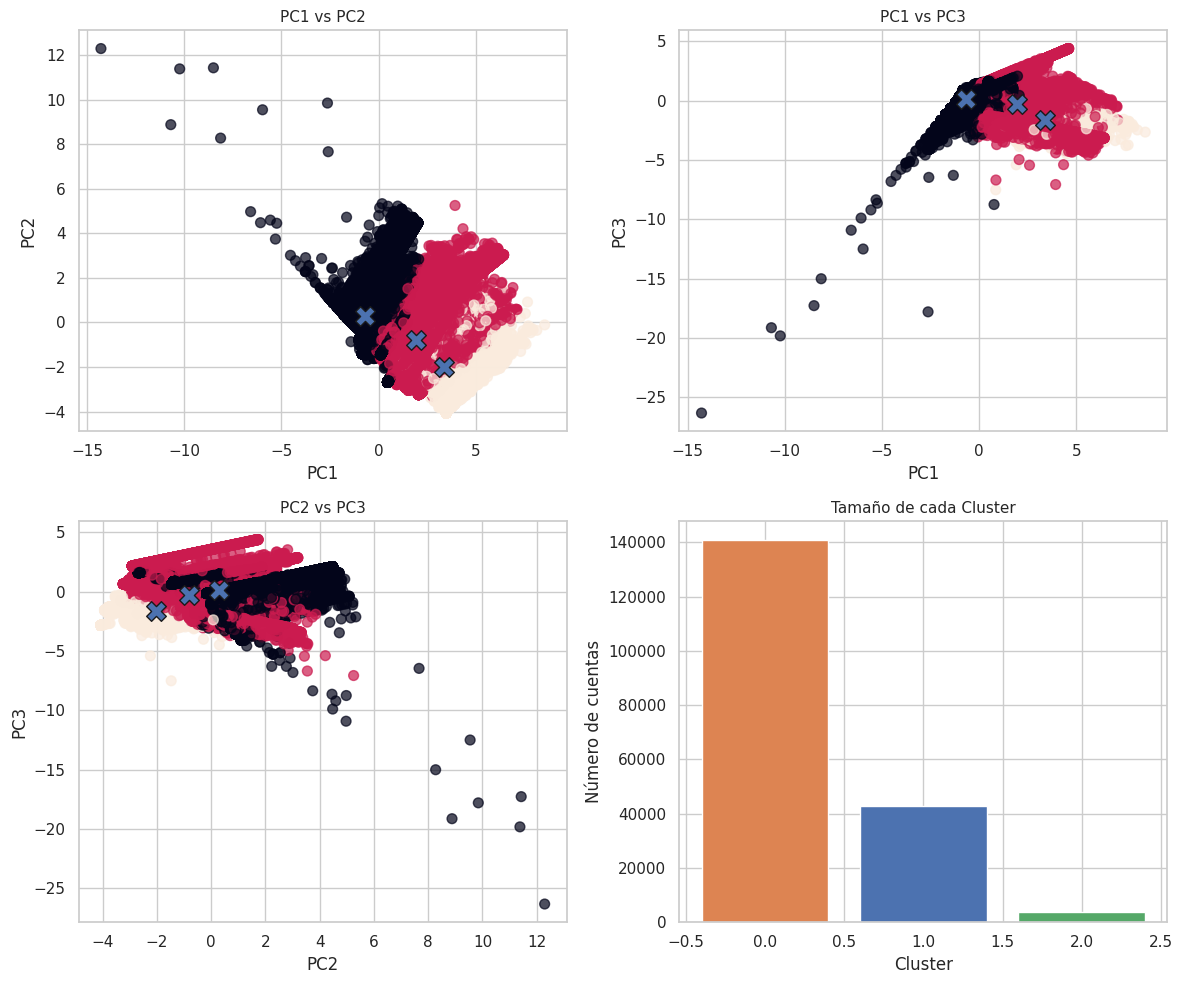

In [ ]:


# 5. Calcula centroides en espacio PCA
centers_pca = pca.transform(kmeans.cluster_centers_)

# 6. Crea figura 2×2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# PC1 vs PC2
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=resumen_unido['clusters'], s=50, alpha=0.7)
axes[0, 0].scatter(centers_pca[:, 0], centers_pca[:, 1], marker='X', s=200, edgecolors='k')
axes[0, 0].set(title='PC1 vs PC2', xlabel='PC1', ylabel='PC2')

# PC1 vs PC3
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 2], c=resumen_unido['clusters'], s=50, alpha=0.7)
axes[0, 1].scatter(centers_pca[:, 0], centers_pca[:, 2], marker='X', s=200, edgecolors='k')
axes[0, 1].set(title='PC1 vs PC3', xlabel='PC1', ylabel='PC3')

# PC2 vs PC3
axes[1, 0].scatter(X_pca[:, 1], X_pca[:, 2], c=resumen_unido['clusters'], s=50, alpha=0.7)
axes[1, 0].scatter(centers_pca[:, 1], centers_pca[:, 2], marker='X', s=200, edgecolors='k')
axes[1, 0].set(title='PC2 vs PC3', xlabel='PC2', ylabel='PC3')

# Bar chart de tamaño de clusters
cluster_counts = Counter(resumen_unido['clusters'])
axes[1, 1].bar(cluster_counts.keys(), cluster_counts.values(), color=['C0','C1','C2'])
axes[1, 1].set(title='Tamaño de cada Cluster', xlabel='Cluster', ylabel='Número de cuentas')

plt.tight_layout()
plt.show()


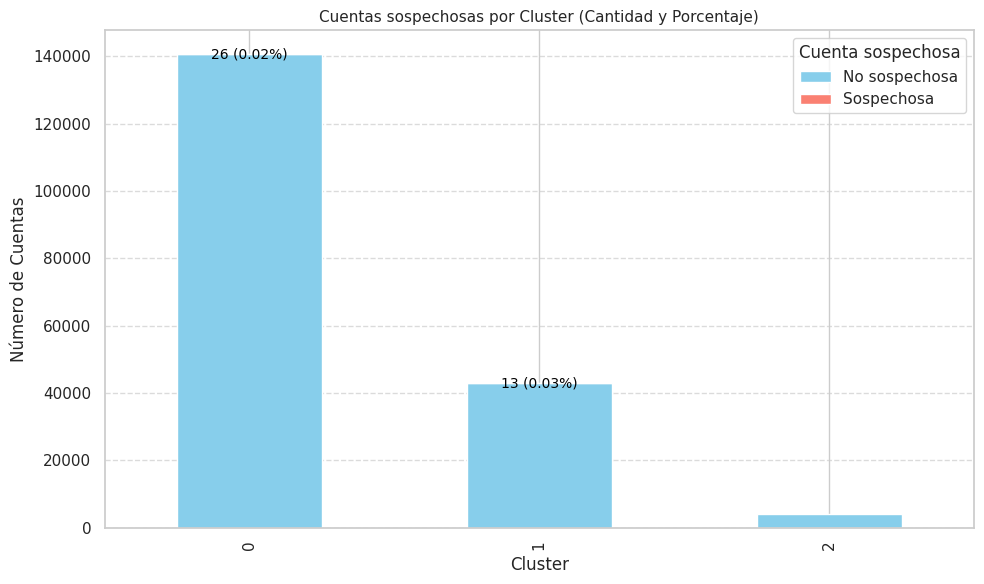

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de cuentas sospechosas por cluster
conteo = resumen_unido.groupby(['clusters', 'cuenta_sospechosa']).size().unstack(fill_value=0)

# Calcular el total por cluster y el % de cuentas sospechosas
totales = conteo.sum(axis=1)
porcentaje_sospechosas = (conteo[True] / totales * 100).fillna(0)

# Gráfico de barras apiladas
ax = conteo.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Agregar número y porcentaje sobre cada barra sospechosa
for idx, (sospechosas, total) in enumerate(zip(conteo[True], totales)):
    if sospechosas > 0:
        pct = porcentaje_sospechosas.iloc[idx]
        ax.text(
            idx,
            conteo.iloc[idx, 0] + sospechosas / 2,
            f'{sospechosas} ({pct:.2f}%)',
            ha='center',
            va='center',
            fontsize=10,
            color='black'
        )

# Estética del gráfico
plt.title('Cuentas sospechosas por Cluster (Cantidad y Porcentaje)')
plt.xlabel('Cluster')
plt.ylabel('Número de Cuentas')
plt.legend(['No sospechosa', 'Sospechosa'], title='Cuenta sospechosa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Estadísticas descriptivas por cluster
features = [
    'total_monto', 'media_monto', 'std_monto', 'razon_de_destino',
    'format_cash', 'format_cheque', 'format_credit card',
    'razon_de_origen', 'Re_entrada_Salida','D_prop_sospe', 'transacciones_sospechosas'
]

cluster_stats = resumen_unido.groupby('clusters')[features].agg(
    cantidad_cuentas        = ('total_monto', 'count'),
    promedio_total_monto    = ('total_monto', 'mean'),
    min_total_monto         = ('total_monto', 'min'),
    max_total_monto         = ('total_monto', 'max'),
    std_total_monto         = ('total_monto', 'std'),

    promedio_media_monto    = ('media_monto', 'mean'),
    std_media_monto         = ('media_monto', 'std'),

    promedio_std_monto      = ('std_monto', 'mean'),

    promedio_razon_destino  = ('razon_de_destino', 'mean'),

    uso_cash                = ('format_cash', 'mean'),
    uso_cheque              = ('format_cheque', 'mean'),
    uso_tarjeta             = ('format_credit card', 'mean'),

    promedio_razon_origen   = ('razon_de_origen', 'mean'),
    promedio_reentrada      = ('Re_entrada_Salida', 'mean'),
    D_prop_sospechosa       = ('D_prop_sospe', 'mean'),
    transacciones_sospechosas  = ('transacciones_sospechosas', 'mean')
).round(2)



# Mostrar resumen
cluster_stats.head()

,cantidad_cuentas,promedio_total_monto,min_total_monto,max_total_monto,std_total_monto,promedio_media_monto,std_media_monto,promedio_std_monto,promedio_razon_destino,uso_cash,uso_cheque,uso_tarjeta,promedio_razon_origen,promedio_reentrada,D_prop_sospechosa,transacciones_sospechosas
clusters,,,,,,,,,,,,,,,,
0,140732,1568.56,0.0,11833.83,2652.21,1551.22,2640.92,14.11,1.00,0.00,0.00,0.07,0.90,1.22,0.0,0.0
1,42907,2946.09,0.0,11833.52,3212.56,1541.50,1979.97,1320.75,0.64,0.00,0.32,0.11,0.40,0.69,0.0,0.0
2,3929,3278.96,0.0,11831.41,3227.32,1046.78,1122.74,919.32,0.50,0.37,0.32,0.10,0.45,0.37,0.0,0.0


<ipython-input-158-2177617037>:39: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
<ipython-input-158-2177617037>:39: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


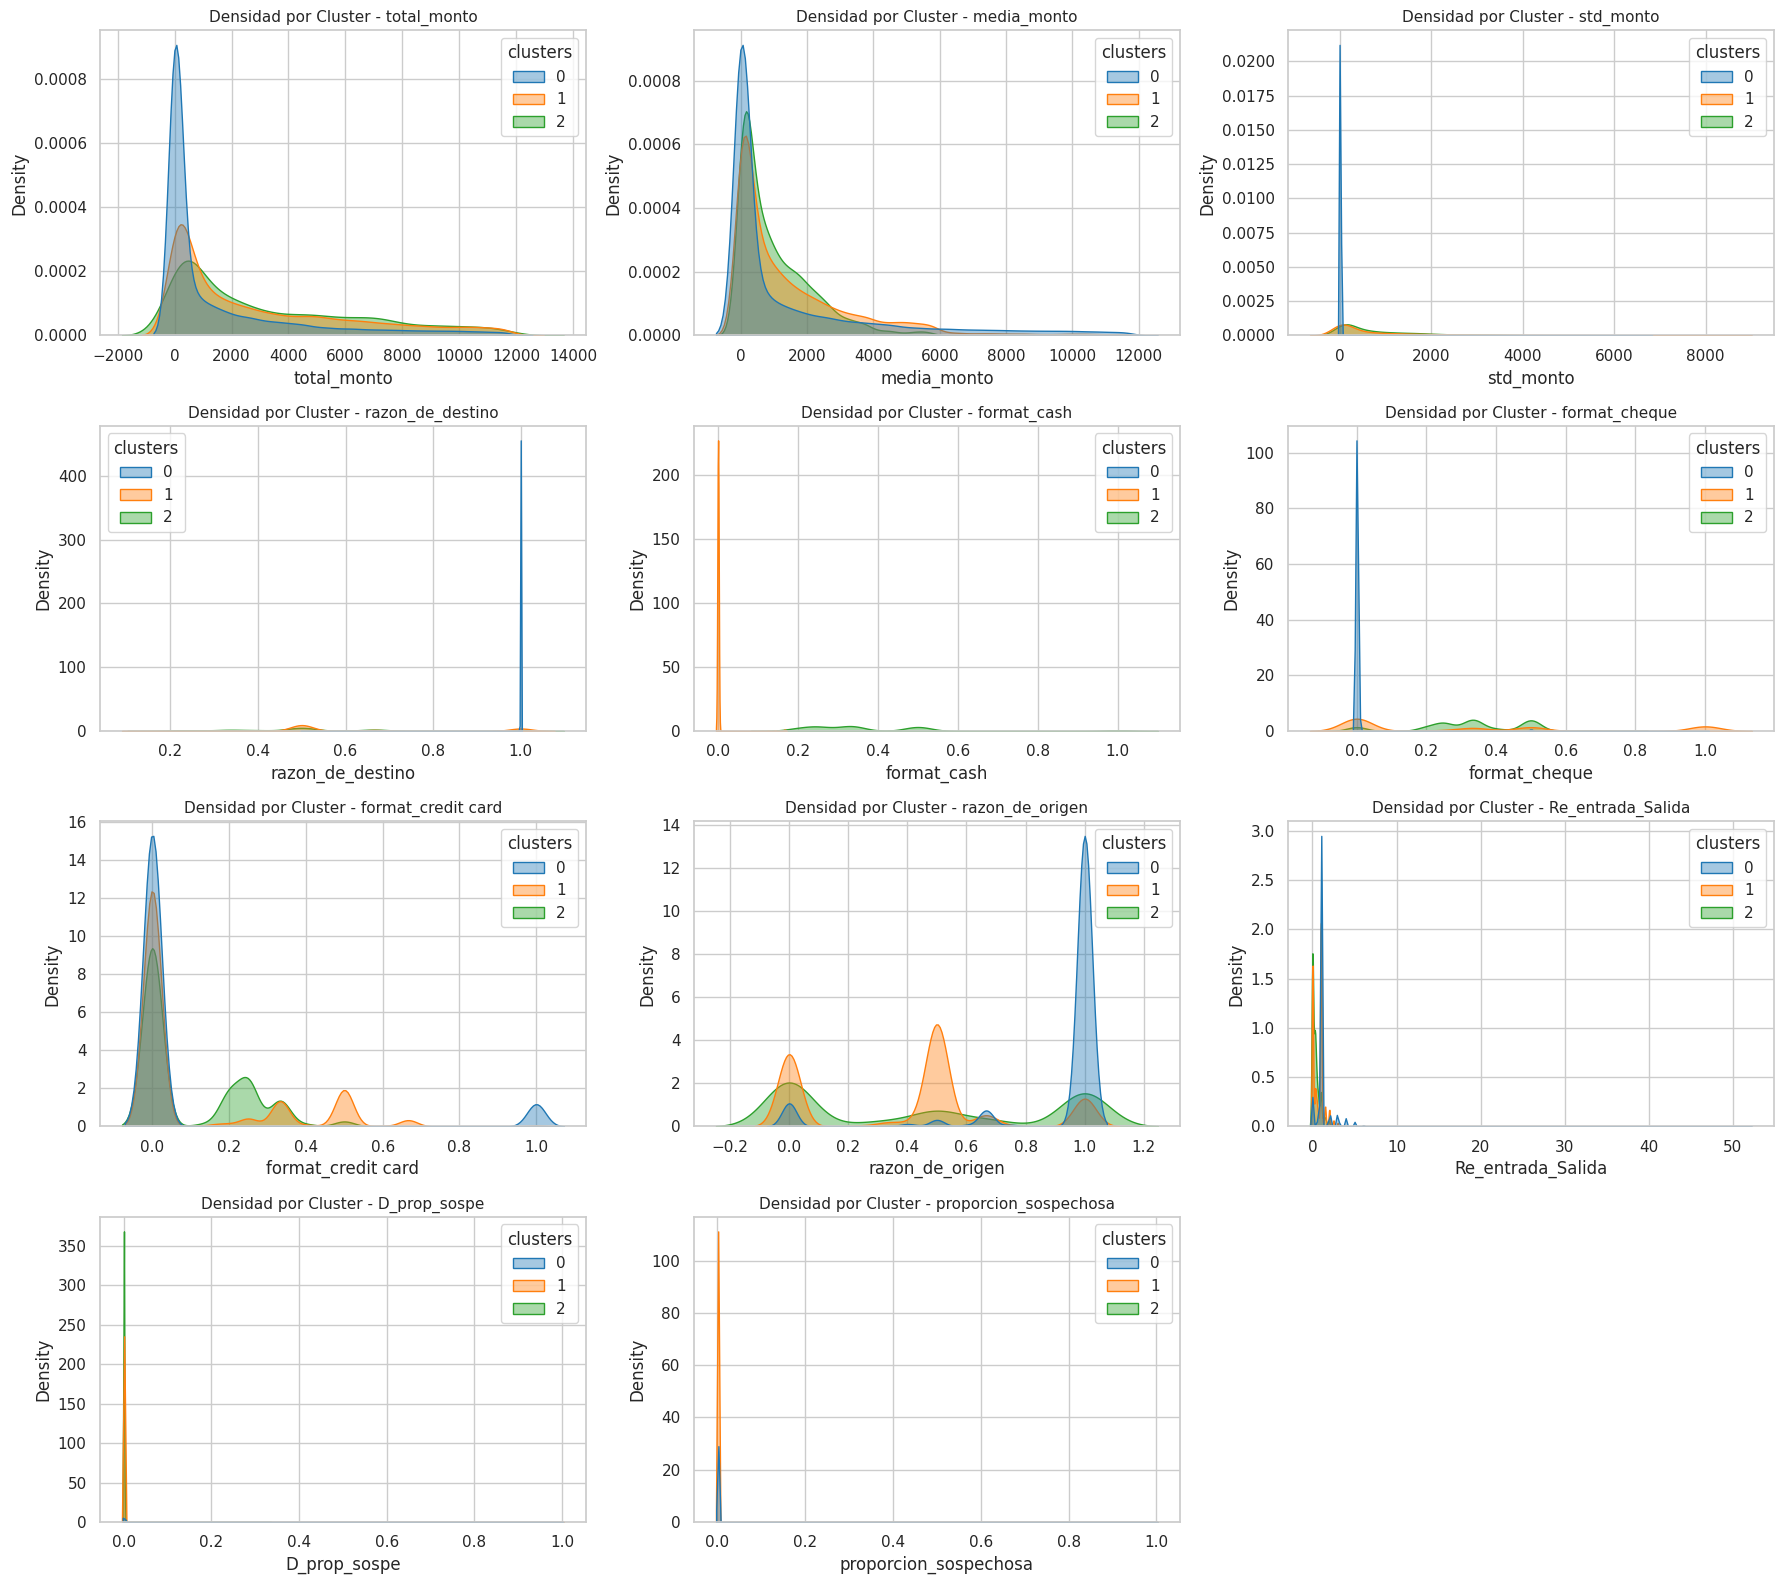

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta personalizada con colores bien diferenciados
palette = {
    0: '#1f77b4',  # Azul fuerte
    1: '#ff7f0e',  # Naranja
    2: '#2ca02c',  # Verde
    3: '#d62728',  # Rojo
    4: '#9467bd'   # Púrpura (por si llegas a tener más de 3 clusters)
}

# Lista de variables numéricas
variables = [
    'total_monto',
    'media_monto',
    'std_monto',
    'razon_de_destino',
    'format_cash',
    'format_cheque',
    'format_credit card',
    'razon_de_origen',
    'Re_entrada_Salida',
    'D_prop_sospe',
    'proporcion_sospechosa'
]

# Configuración de subplots
n = len(variables)
ncols = 3
nrows = -(-n // ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
axes = axes.flatten()

# Graficar densidades con colores diferenciados
for i, var in enumerate(variables):
    ax = axes[i]
    sns.kdeplot(
        data=resumen_unido,
        x=var,
        hue='clusters',
        fill=True,
        common_norm=False,
        alpha=0.4,
        ax=ax,
        palette=palette
    )
    ax.set_title(f'Densidad por Cluster - {var}')
    ax.grid(True)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# Leer los datos

df=resumen_unido

# Convertir valores booleanos a 0 y 1
df['cuenta_sospechosa'] = df['cuenta_sospechosa'].astype(int)



no_sospechosas = df[df['cuenta_sospechosa'] == 0].sample(n=500, random_state=42)

# Seleccionar TODOS los registros sospechosos
sospechosas = df[df['cuenta_sospechosa'] == 1]

# Unir ambos DataFrames
df2 = pd.concat([sospechosas, no_sospechosas], axis=0)



# Variables predictoras seleccionadas
variables = [
    'total_monto',
    'media_monto',
    'std_monto',
    'razon_de_destino',
    'D_total_monto',
    'D_media_monto',
    'D_std_monto',
    'razon_de_origen',
    'format_cash',
    'format_cheque',
    'format_credit card',
    'Re_entrada_Salida'
]

X = df2[variables]
y = df2['cuenta_sospechosa']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar modelo logístico con scikit-learn
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# También puedes usar statsmodels para ver significancia de variables
X_sm = sm.add_constant(X)  # Agregar constante
modelo_sm = sm.Logit(y, X_sm)
resultado = modelo_sm.fit()
print(resultado.summary())

Matriz de confusión:
[[138   4]
 [ 27  11]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       142
           1       0.73      0.29      0.42        38

    accuracy                           0.83       180
   macro avg       0.78      0.63      0.66       180
weighted avg       0.81      0.83      0.80       180

Optimization terminated successfully.
         Current function value: 0.272404
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:      cuenta_sospechosa   No. Observations:                  598
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           12
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.3893
Time:                        15:00:38   Log-Likelihood:                -162.90
converged:               

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


# 📝 Resumen de resultados del modelo logístico para detección de cuentas sospechosas

Se desarrolló un modelo de regresión logística con el fin de identificar patrones asociados a cuentas potencialmente sospechosas, utilizando un conjunto balanceado de datos que incluye 500 cuentas no sospechosas y todas las cuentas marcadas como sospechosas. La variable dependiente fue `cuenta_sospechosa`, codificada como 1 para sospechosa y 0 para no sospechosa.

El modelo mostró un buen ajuste general, con un **Pseudo R² de 0.3893**, lo cual indica que una proporción considerable de la variabilidad en la sospecha de las cuentas puede ser explicada por las variables incluidas.

## 📌 Principales hallazgos:

- **Monto total de transacciones (`total_monto`)** tuvo un impacto positivo significativo, indicando que a mayor monto transado, mayor es la probabilidad de que la cuenta sea considerada sospechosa.
- Por el contrario, **el promedio (`media_monto`) y la desviación estándar (`std_monto`) de los montos** se relacionan negativamente con la probabilidad de sospecha, lo que sugiere que cuentas con patrones de montos más regulares y altos tienden a no ser catalogadas como riesgosas.
- Las variables **`razon_de_destino` y `razon_de_origen`** también resultaron significativas, mostrando que la razón de las transferencias puede influir decisivamente en la clasificación de una cuenta.
- En cuanto a los **medios de transacción**, el uso de **efectivo (`format_cash`) y cheques (`format_cheque`)** se asoció negativamente con la sospecha, lo cual puede responder a particularidades del dataset o sesgos en la codificación de las transacciones.
- Finalmente, una **mayor proporción de reentrada y salida de fondos (`Re_entrada_Salida`)** se asocia con menor probabilidad de que la cuenta sea sospechosa.

## ⚠️ Variables no significativas:

Varias variables relacionadas con diferencias absolutas entre cuentas (como `D_total_monto`, `D_media_monto`, `D_std_monto`) no mostraron significancia estadística, lo que sugiere que podrían eliminarse en versiones futuras del modelo sin pérdida de capacidad predictiva.

---

## ✅ Conclusión:

El modelo permite identificar con claridad varios factores de riesgo relevantes y podría ser útil como herramienta de apoyo en sistemas de monitoreo financiero para la detección de actividades inusuales o potencialmente ilícitas.




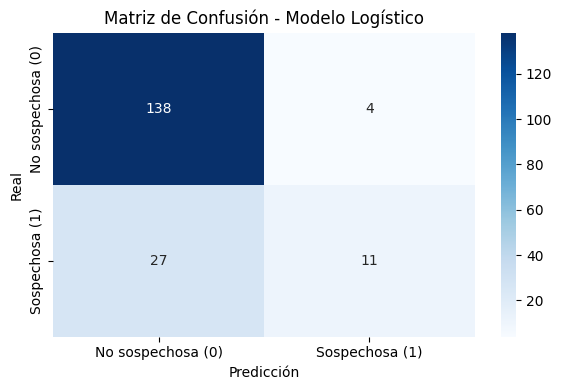

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# Etiquetas para el gráfico
etiquetas = ['No sospechosa (0)', 'Sospechosa (1)']

# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)

plt.title("Matriz de Confusión - Modelo Logístico")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [1]:
df2.shape

NameError: name 'df2' is not defined

In [ ]:
# Gráfica ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Detección de Fraude')
plt.legend(loc='lower right')
plt.grid()
plt.show()